In [1]:
import os
import pandas as pd
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from scipy.optimize import curve_fit 

In [19]:
def get_solution_log(start):
    solution_log = pd.DataFrame()
    for root,dirs,files in os.walk(start):
        for f in files:
            if f == 'solution_log.csv':
                name = os.path.join(root,f)
                solution_log = solution_log.append(pd.read_csv(name))
    return solution_log
                
def get_user_element_progress(start):
    user_element_progress = pd.DataFrame()
    for root,dirs,files in os.walk(start):
        for f in files:
            if f == 'user_element_progress.csv':
                name = os.path.join(root,f)
                user_element_progress = user_element_progress.append(pd.read_csv(name))
    return user_element_progress

def get_user_module_progress(start):
    user_module_progress = pd.DataFrame()
    for root,dirs,files in os.walk(start):
        for f in files:
            if f == 'user_module_progress.csv':
                name = os.path.join(root,f)
                user_module_progress = user_module_progress.append(pd.read_csv(name))
    return user_module_progress




In [20]:
start = '/Users/sinya/Desktop/CS центр/Практика Сириус/metrics_validation_data'

user_element_progress = get_user_element_progress(start)
solution_log = get_solution_log(start)
user_module_progress = get_user_module_progress(start)



/var/folders/j6/s_97y2yj305b04bzrcv8_hbh0000gn/T/ipykernel_49318/1446635862.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_element_progress = user_element_progress.append(pd.read_csv(name))
/var/folders/j6/s_97y2yj305b04bzrcv8_hbh0000gn/T/ipykernel_49318/1446635862.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_element_progress = user_element_progress.append(pd.read_csv(name))
/var/folders/j6/s_97y2yj305b04bzrcv8_hbh0000gn/T/ipykernel_49318/1446635862.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_element_progress = user_element_progress.append(pd.read_csv(name))
/var/folders/j6/s_97y2yj305b04bzrcv8_hbh0000gn/T/ipykernel_49318/1446635862.py:16: FutureWarning: The frame.append method is depre

/var/folders/j6/s_97y2yj305b04bzrcv8_hbh0000gn/T/ipykernel_49318/1446635862.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_element_progress = user_element_progress.append(pd.read_csv(name))
/var/folders/j6/s_97y2yj305b04bzrcv8_hbh0000gn/T/ipykernel_49318/1446635862.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_element_progress = user_element_progress.append(pd.read_csv(name))
/var/folders/j6/s_97y2yj305b04bzrcv8_hbh0000gn/T/ipykernel_49318/1446635862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  solution_log = solution_log.append(pd.read_csv(name))
/var/folders/j6/s_97y2yj305b04bzrcv8_hbh0000gn/T/ipykernel_49318/1446635862.py:7: FutureWarning: The frame.append method is deprecated and will be re

/var/folders/j6/s_97y2yj305b04bzrcv8_hbh0000gn/T/ipykernel_49318/1446635862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  solution_log = solution_log.append(pd.read_csv(name))
/var/folders/j6/s_97y2yj305b04bzrcv8_hbh0000gn/T/ipykernel_49318/1446635862.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_module_progress = user_module_progress.append(pd.read_csv(name))
/var/folders/j6/s_97y2yj305b04bzrcv8_hbh0000gn/T/ipykernel_49318/1446635862.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_module_progress = user_module_progress.append(pd.read_csv(name))
/var/folders/j6/s_97y2yj305b04bzrcv8_hbh0000gn/T/ipykernel_49318/1446635862.py:25: FutureWarning: The frame.append method is deprecated and will be remov

/var/folders/j6/s_97y2yj305b04bzrcv8_hbh0000gn/T/ipykernel_49318/1446635862.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_module_progress = user_module_progress.append(pd.read_csv(name))


In [44]:
# найдем учеников, решивших модуль самостоятельно, с наилучшим прогрессом
best = user_module_progress[user_module_progress['achieve_reason']=='solved']
best.groupby(by = 'user_id').sum()
best_id = best.sort_values(by = 'progress_current', ascending=False)['user_id'].head(30000).values



In [22]:
# объединим информацию о попытках решить элемент и о его прогрессе по элементам, что б привязать попытки к ученикам
df_merged = pd.merge(user_element_progress, solution_log,
                       how='left', left_on='id', right_on = 'element_progress_id')

In [45]:
# построим гистограму 0.75 квантилей интервалов между попытками для всех пользователей

quant = []

for selected_id in range(10000):

    example_user = df_merged[df_merged['user_id']==best_id[selected_id]]
    example_user = example_user[example_user['course_element_type']=='task']
    example_user['submission_time'] = pd.to_datetime(example_user['submission_time'])
    example_user = example_user.sort_values(by = 'submission_time')

    prev_date = example_user['submission_time'].values[0]
    delays = []


    for cur_date in example_user['submission_time'].values[1:]:
        if (cur_date - prev_date) < np.timedelta64(24, 'h'):
            delays.append((cur_date - prev_date)/ np.timedelta64(1, 'm'))
            prev_date = cur_date
   
    if delays != []:    
        quant.append(np.quantile(delays,0.95))




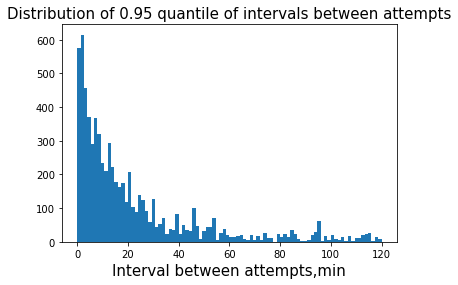

In [49]:
plt.hist(quant, bins = 90, range = (0,120))
plt.title('Distribution of 0.95 quantile of intervals between attempts', fontsize=15)
plt.xlabel('Interval between attempts,min', fontsize=15)
plt.show()